In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### PART I: Analyzing Netflix quotes (close price) for 2019

#### Loading the downloaded quotes file of Netflix from NASDAQ. Reading only __date__ and __close price__
___

In [2]:
quotes = pd.read_csv('../data/nasdaq_netlflix_historical_quotes.csv')
quotes = quotes.rename(columns={'Date': 'date', ' Close/Last': 'close_price',
                                ' Volume': 'volume'})
quotes = quotes[['date', 'close_price', 'volume']]

#### Cleaning __date__
___
- Changing data type of date
- Filtering data since I will be looking at 2019's data

In [3]:
quotes['date'] = quotes['date'].astype('datetime64[ns]')
quotes = quotes[(quotes.date >= '2019-01-01') & (quotes.date <= '2019-12-31')]

#### Cleaning __close price__
___
- Removing '$' sign
- Changing data type of close price

In [4]:
quotes['close_price'] = quotes['close_price'].apply(lambda r: r.replace(" $", ""))
quotes['close_price'] = quotes['close_price'].astype('double')

#### Extracting more information
___
- The close price in itself is not telling me much, so I need something else.
- I am actually interested in knowing whether price increased/decreased and so that's what I'll compute in __diff__ column.

In [5]:
quotes['diff'] = quotes.close_price.diff()

#### Understanding the data
___
- Since price fluctuations are floating point integers I first bucket them in bins of size=1, i.e., all price jumps between 0.0 to 1.0 will fall in the bucket (0, 1]
- To make working with buckets easier (since it is of interval type) I add the __code__ column having category codes.
- I then plot a histogram to visualize the data and see how the price fluctuations are distributed.

In [6]:
quotes['bucket'] = pd.cut(quotes['diff'], list(range(round(quotes['diff'].min())-1, 
                                                     round(quotes['diff'].max())+1)))

In [7]:
quotes['code'] = quotes.bucket.cat.codes

(array([ 3.,  1.,  5., 17., 33., 73., 76., 29.,  9.,  6.]),
 array([-1. ,  3.6,  8.2, 12.8, 17.4, 22. , 26.6, 31.2, 35.8, 40.4, 45. ]),
 <BarContainer object of 10 artists>)

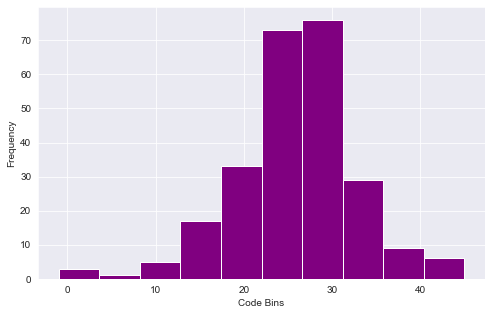

In [8]:
sns.set_style('darkgrid')
plt.figure(figsize=(8,5))
plt.xlabel("Code Bins") 
plt.ylabel("Frequency")
plt.hist(quotes['code'], color="purple", edgecolor="white")

In [9]:
def ecdf(data):
    """
    Compute ECDF for a one-dimensional array.
    
    """
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1)/n
    return x, y

In [10]:
mu = np.mean(quotes['code'])
sigma = np.std(quotes['code'])

samples = np.random.normal(mu, sigma, size=2500)

x_theoretical, y_theoretical = ecdf(quotes['code'])
x, y = ecdf(samples)

#### Plotting CDF to avoid binning bias while plotting histograms

Text(0, 0.5, 'CDF')

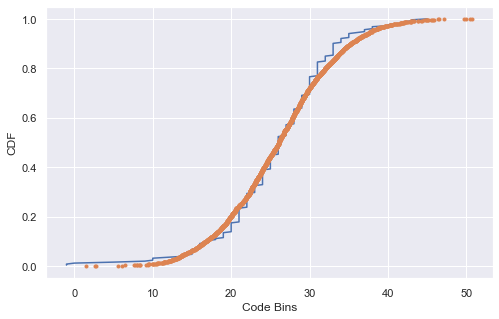

In [11]:
plt.figure(figsize=(8,5))
sns.set()
plt.plot(x_theoretical, y_theoretical)
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('Code Bins')
plt.ylabel('CDF')

##### The above graph shows that it is an approx. normal distribution (which makes sense since in general price variations will fall within a range and will not vary drastically all year round).
##### Majority of the values fall in buckets with codes around 25.
##### I will explore the outlier cases when extraordinary variation was observed.

#### Analyzing the outliers (when more than normal variation in price was observed)
___

<BarContainer object of 9 artists>

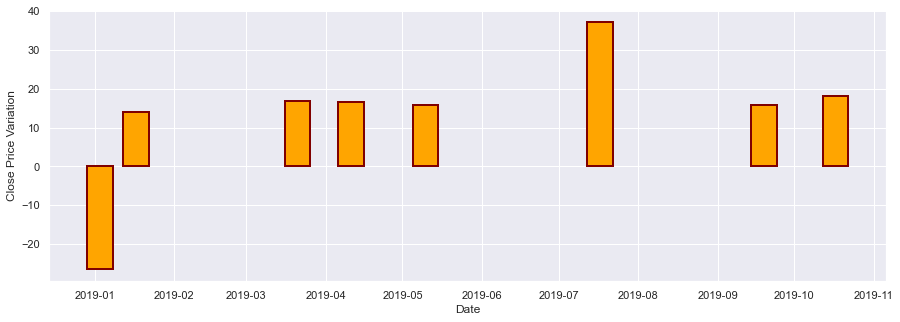

In [12]:
outliers = quotes[(quotes.code < 5) | (quotes.code > 40)][['date', 'diff']]
plt.figure(figsize=(15,5))
plt.xlabel("Date") 
plt.ylabel("Close Price Variation") 
plt.bar(outliers['date'], outliers['diff'], color ='orange', width = 10, 
        edgecolor='maroon', linewidth=2)

In [13]:
outliers = outliers.set_index(('date'))
outliers

,diff
date,
2019-12-31,NaN
2019-10-17,18.05
2019-09-19,15.85
2019-07-17,37.23
2019-05-10,15.78
2019-04-11,16.51
2019-03-21,16.86
2019-01-17,14.09
2019-01-03,-26.37


##### From the observations above we can see that the price fluctuated maximum around mid-July.

### PART II: Analyzing Google trends data for Stranger Things (a popular Netflix show) in 2019

#### Reading the file downloaded from Google Trends website
___

In [14]:
trends = pd.read_csv('../data/stanger_things_google_trends_2019.csv', skiprows=1, sep=",")

#### Plotting the trends data
___

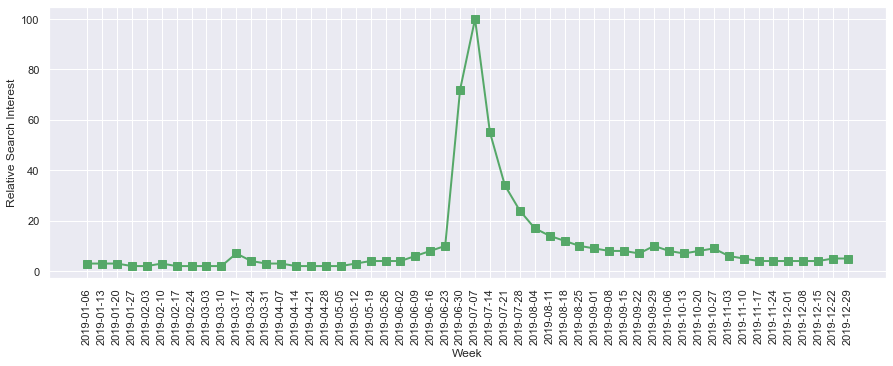

In [15]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
plt.xlabel("Week") 
plt.ylabel("Relative Search Interest") 
plt.plot(trends.set_index('Week'), "gs-", linewidth=2, markersize=8)

##### If we look at the plot above then the peak occured around first week of July.
##### This happens to be the around the release date (4th July) of the third season of Stranger Things.
##### Could it be that this somehow impacted the price variation we saw above in Neflix stocks around this time?
##### Maybe Yes, Maybe No.